## Observations and Insights 

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
total_mice_df = pd.merge(study_results,mouse_metadata,how = 'left', on="Mouse ID")


# Display the data table for preview
total_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [166]:
# Checking the number of mice.
total_mice_df['Mouse ID'].value_counts().count()

249

In [167]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = total_mice_df.loc[total_mice_df.duplicated(subset =["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [168]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = total_mice_df[total_mice_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [169]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = total_mice_df[total_mice_df['Mouse ID']!='g989']
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [170]:
# Checking the number of mice in the clean DataFrame.
just_count = clean_mice_df['Mouse ID'].value_counts().count()
just_count

248

## Summary Statistics

In [171]:
# Generate aa summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_data = clean_mice_df[["Mouse ID", "Drug Regimen", "Sex", "Timepoint", "Tumor Volume (mm3)"]]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_drug = mice_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std])
sem_mice = mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_data_df = pd.merge(group_drug, sem_mice, on="Drug Regimen")
summary_data_df.rename(columns={"mean": "Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "Tumor Volume (mm3)":"Tumor Volume Std. Err"}, inplace=True)
summary_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
group_drug_agg = mice_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std])
sem_mice = mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
agg_data_df = pd.merge(group_drug, sem_mice, on="Drug Regimen")
agg_data_df = agg_data_df.rename(columns={"Tumor Volume (mm3)":"sem"})
agg_data_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

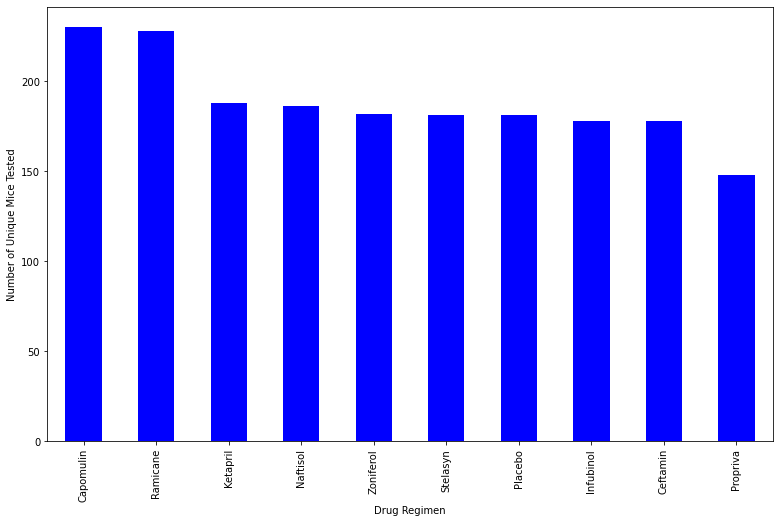

In [173]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = clean_mice_df["Drug Regimen"].value_counts()

drug_data.plot(kind="bar", figsize=(13,8), facecolor = "blue")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

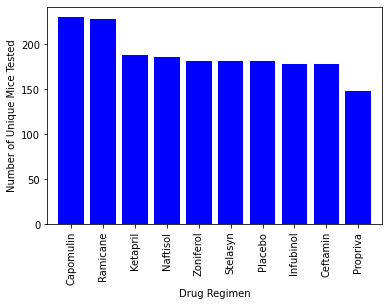

In [174]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_data = clean_mice_df["Drug Regimen"].value_counts()
plt.bar(drug_data.index.values, drug_data.values, color = "b")
plt.xticks(rotation = "vertical")
plt.xlim(-0.75, len(drug_data)-0.25)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

Text(0, 0.5, 'Sex')

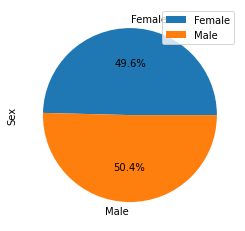

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
just_mice_df = clean_mice_df.drop_duplicates("Mouse ID")
group_just = just_mice_df.groupby(["Sex"])
total_just = group_just["Sex"].count()
just_summary = pd.DataFrame({"Sex Count": total_just})

percent_sex = (total_just / just_count) * 100
percent_sex = pd.DataFrame({"Percentage by Sex": percent_sex})
percent_just = pd.merge(just_summary, percent_sex, on="Sex")

just_pie = percent_sex.plot(kind="pie", autopct = "%1.1f%%", y="Percentage by Sex")
just_pie.set_ylabel("Sex")

C:\Users\restr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Sex')

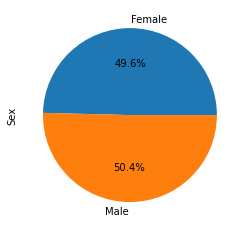

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(percent_sex, autopct = "%1.1f%%", labels = labels)
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_tumor = clean_mice_df[clean_mice_df["Drug Regimen"] == "Capomulin"]
ram_tumor = clean_mice_df[clean_mice_df["Drug Regimen"] == "Ramicane"]
inf_tumor = clean_mice_df[clean_mice_df["Drug Regimen"] == "Infubinol"]
cef_tumor = clean_mice_df[clean_mice_df["Drug Regimen"] == "Ceftamin"]



# Start by getting the last (greatest) timepoint for each mouse
last_cap = cap_tumor.groupby("Mouse ID").last()["Timepoint"]
last_ram = ram_tumor.groupby("Mouse ID").last()["Timepoint"]
last_inf = inf_tumor.groupby("Mouse ID").last()["Timepoint"]
last_cef = cef_tumor.groupby("Mouse ID").last()["Timepoint"]
cap_pd = pd.DataFrame(last_cap)
ram_pd = pd.DataFrame(last_ram)
inf_pd = pd.DataFrame(last_inf)
cef_pd = pd.DataFrame(last_cef)



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_vol = pd.merge(cap_tumor, cap_pd, on= ("Mouse ID", "Timepoint"))
ram_vol = pd.merge(ram_tumor, ram_pd, on= ("Mouse ID", "Timepoint"))
inf_vol = pd.merge(inf_tumor, inf_pd, on= ("Mouse ID", "Timepoint"))
cef_vol = pd.merge(cef_tumor, cef_pd, on= ("Mouse ID", "Timepoint"))




In [178]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumors_cap = cap_vol["Tumor Volume (mm3)"]
quartiles_cap = tumors_cap.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap

tumors_ram = ram_vol["Tumor Volume (mm3)"]
quartiles_ram = tumors_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram

tumors_inf = inf_vol["Tumor Volume (mm3)"]
quartiles_inf = tumors_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf

tumors_cef = cef_vol["Tumor Volume (mm3)"]
quartiles_cef = tumors_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef


    
    
    # Determine outliers using upper and lower bounds
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

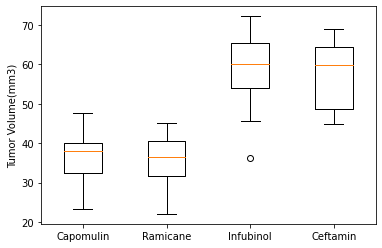

In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume = [tumors_cap, tumors_ram, tumors_inf, tumors_cef]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_volume, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

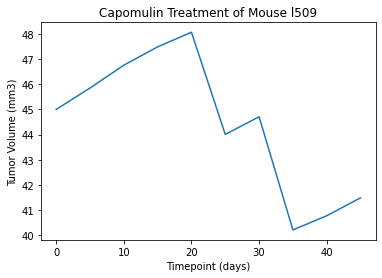

In [180]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_line = cap_tumor[cap_tumor["Mouse ID"] == "l509"]
cap_x = cap_line["Timepoint"]
cap_y = cap_line["Tumor Volume (mm3)"]

plt.plot(cap_x, cap_y)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

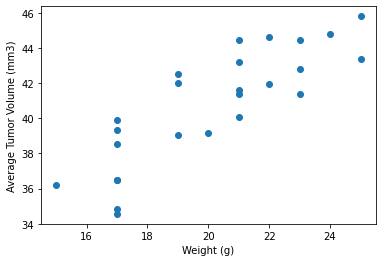

In [181]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mean = cap_tumor.groupby(cap_tumor["Mouse ID"]).mean()
plt.scatter(cap_mean["Weight (g)"],cap_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is {0.84}


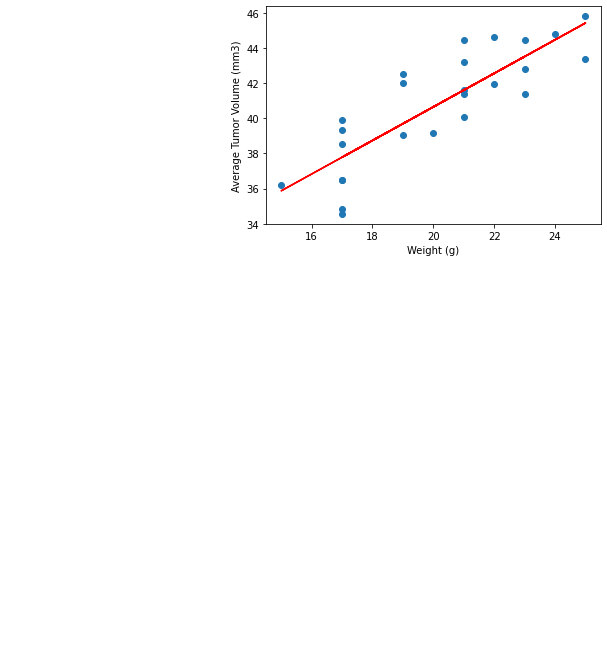

In [182]:
# Calculate the correlation coefficient and linear regression model 
cap_corr = {round(st.pearsonr(cap_mean["Weight (g)"],cap_mean["Tumor Volume (mm3)"])[0],2)}

# for mouse weight and average tumor volume for the Capomulin regimen
print(f'The correlation coefficient between mouse weight and average tumor volume is {cap_corr}')

x_values = cap_mean["Weight (g)"]
y_values = cap_mean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()